In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import datetime as dt
sns.set_style('darkgrid')

import sys
sys.path.append("../")
from Utils import *

In [13]:
dataset_name = 'aruba'
dataset = pick_dataset(dataset_name)

dataset['duration'] = (dataset.end_date - dataset.date).apply(lambda x: x.total_seconds())

day = dt.datetime(2000, 2, 7, 6, 0, 0)

dataset['day_ts'] = dataset.date.apply(lambda x: (x-day).total_seconds()%(24*3600))

dataset

,date,end_date,label,duration,day_ts
0,2010-11-04 00:03:50.209589,2010-11-04 05:40:43.642664,sleeping,20213.433075,65030.209589
1,2010-11-04 05:40:51.303739,2010-11-04 05:43:30.279021,bed_to_toilet,158.975282,85251.303739
2,2010-11-04 05:43:45.732400,2010-11-04 08:01:12.282970,sleeping,8246.550570,85425.732400
3,2010-11-04 08:11:09.966157,2010-11-04 08:27:02.801314,meal_preparation,952.835157,7869.966157
4,2010-11-04 08:33:52.929406,2010-11-04 08:35:45.822482,meal_preparation,112.893076,9232.929406
...,...,...,...,...,...
6435,2011-06-11 17:58:01.269227,2011-06-11 18:14:30.112460,relax,988.843233,43081.269227
6436,2011-06-11 18:17:06.835188,2011-06-11 20:33:44.453476,relax,8197.618288,44226.835188
6437,2011-06-11 20:51:40.625871,2011-06-11 21:18:10.632466,relax,1590.006595,53500.625871
6438,2011-06-11 21:18:58.841500,2011-06-11 22:05:07.486416,relax,2768.644916,55138.841500


{'relax': {'mean_time': '10:20:50.815516',
  'std_time': '5:06:55.077852',
  'mean_duration': '0:33:26.497771',
  'std_duration': '0:33:30.759946',
  'accuracy': 1}}

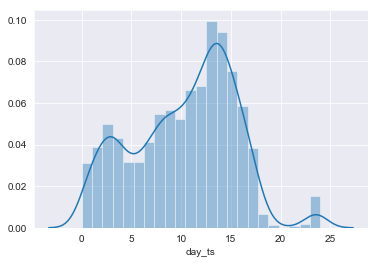

In [22]:
parameters = ['mean_time', 'std_time', 'mean_duration', 'std_duration', 'accuracy']

behaviors = {}

sleeping = {
    'mean_time': dt.timedelta(hours=19, minutes=0).total_seconds(),
    'std_time': dt.timedelta(hours=5, minutes=18).total_seconds(),
    'mean_duration': dt.timedelta(hours=4, minutes=40).total_seconds(),
    'std_duration': dt.timedelta(hours=2, minutes=20).total_seconds(),
    'accuracy': 1
} 

lunch = {
    'mean_time': dt.timedelta(hours=13, minutes=25).total_seconds(),
    'std_time': dt.timedelta(hours=0, minutes=30).total_seconds(),
    'mean_duration': dt.timedelta(hours=0, minutes=40).total_seconds(),
    'std_duration': dt.timedelta(hours=0, minutes=10).total_seconds(),
    'accuracy': 1
}

work = {
    'mean_time': dt.timedelta(hours=7, minutes=30).total_seconds(),
    'std_time': dt.timedelta(hours=4, minutes=6).total_seconds(),
    'mean_duration': dt.timedelta(hours=0, minutes=17).total_seconds(),
    'std_duration': dt.timedelta(hours=0, minutes=21).total_seconds(),
    'accuracy': 1
}

labels = ['relax']

for label in labels :
    original_behavior = {}
    label_data = dataset[dataset.label == label]
    # Distribution on occurrence time
    sns.distplot(label_data.day_ts/3600)
    mean_occ_time = label_data.day_ts.mean()
    original_behavior['mean_time'] = str(dt.timedelta(seconds=mean_occ_time))
    std_occ_time = label_data.day_ts.std()
    original_behavior['std_time'] = str(dt.timedelta(seconds=std_occ_time))
    
    mean_duration = label_data.duration.mean()
    original_behavior['mean_duration'] = str(dt.timedelta(seconds=mean_duration))
    std_duration = label_data.duration.std()
    original_behavior['std_duration'] = str(dt.timedelta(seconds=std_duration))
    
    original_behavior['accuracy'] = 1
    
    behaviors[label] = original_behavior


behaviors

In [15]:
x = [1,2,3,4]

In [19]:
str(dt.timedelta(hours=1.2))

'1:12:00'